In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
motores_unicos = pd.read_excel('Motores_Unicos.xlsx')

In [3]:
print(motores_unicos)

    ID_Motor  R.P.M  POTENCIA (HP)  VOLTAJE   FRAME           MARCA   CANTIDAD
0       M001   1480            3.0      575   184-T              WEG         1
1       M002   1450            1.0      575   145-T   ALLIS CHALMERS         1
2       M003   1420            3.0      575  S/DATO           LENZE          1
3       M004   1455            3.0      575   132-M           S/DATO         1
4       M005   1450           10.0      550   254-T   ALLIS CHALMERS         4
..       ...    ...            ...      ...     ...              ...       ...
308     M309   1475           60.0      575   365-T  U.S. ELECTRICAL         4
309     M310   1475           40.0      575   326-T  U.S. ELECTRICAL         1
310     M311   1470           13.0      575  S/DATO             ASEA         1
311     M312   1470           30.0      575  S/DATO             ASEA         1
312     M313   1455           40.0      575   225-S             TECO         1

[313 rows x 7 columns]


# Descriptivos

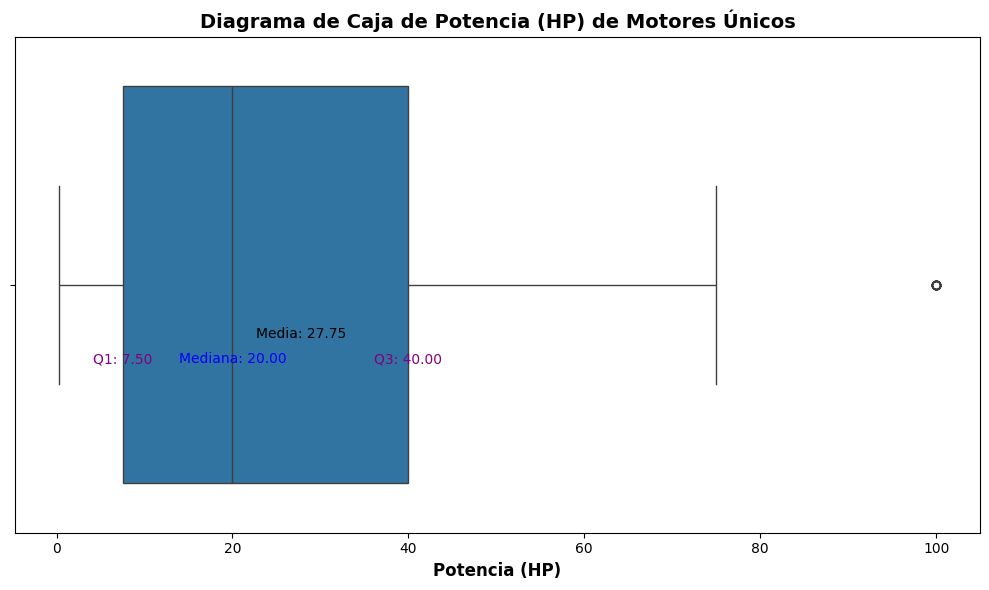

In [4]:
# Calcular los estadísticos importantes
potencia_hp = motores_unicos['POTENCIA (HP)']
median_hp = potencia_hp.median()
mean_hp = potencia_hp.mean()
q1_hp = potencia_hp.quantile(0.25)
q3_hp = potencia_hp.quantile(0.75)

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='POTENCIA (HP)', data=motores_unicos)

# Título y etiquetas
plt.title('Diagrama de Caja de Potencia (HP) de Motores Únicos', fontsize=14, fontweight='bold')
plt.xlabel('Potencia (HP)', fontsize=12, fontweight='bold')

# Anotar la media, mediana y cuartiles en el gráfico
plt.text(mean_hp, 0.1, f'Media: {mean_hp:.2f}', ha='center', va='center', color='black', fontsize=10)
plt.text(median_hp, 0.15, f'Mediana: {median_hp:.2f}', ha='center', va='center', color='blue', fontsize=10)
plt.text(q1_hp, 0.15, f'Q1: {q1_hp:.2f}', ha='center', va='center', color='purple', fontsize=10)
plt.text(q3_hp, 0.15, f'Q3: {q3_hp:.2f}', ha='center', va='center', color='purple', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
 'top', 'bottom', 'center', 'baseline', 'center_baseline'


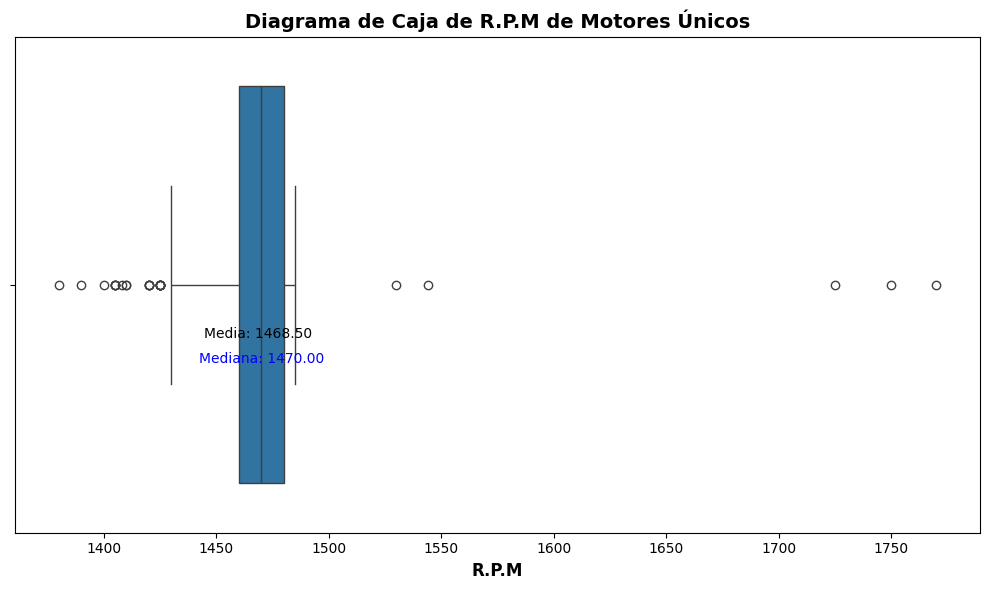

In [23]:
# Calcular los estadísticos importantes
rpm = motores_unicos['R.P.M']
median_rpm = rpm.median()
mean_rpm = rpm.mean()
q1_rpm = rpm.quantile(0.25)
q3_rpm = rpm.quantile(0.75)

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='R.P.M', data=motores_unicos)

# Título y etiquetas
plt.title('Diagrama de Caja de R.P.M de Motores Únicos', fontsize=14, fontweight='bold')
plt.xlabel('R.P.M', fontsize=12, fontweight='bold')

# Anotar la media, mediana y cuartiles en el gráfico
plt.text(mean_rpm, 0.1, f'Media: {mean_rpm:.2f}', ha='center', va='center', color='black', fontsize=10)
plt.text(median_rpm, 0.15, f'Mediana: {median_rpm:.2f}', ha='center', va='center', color='blue', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Distribuciones Numericas

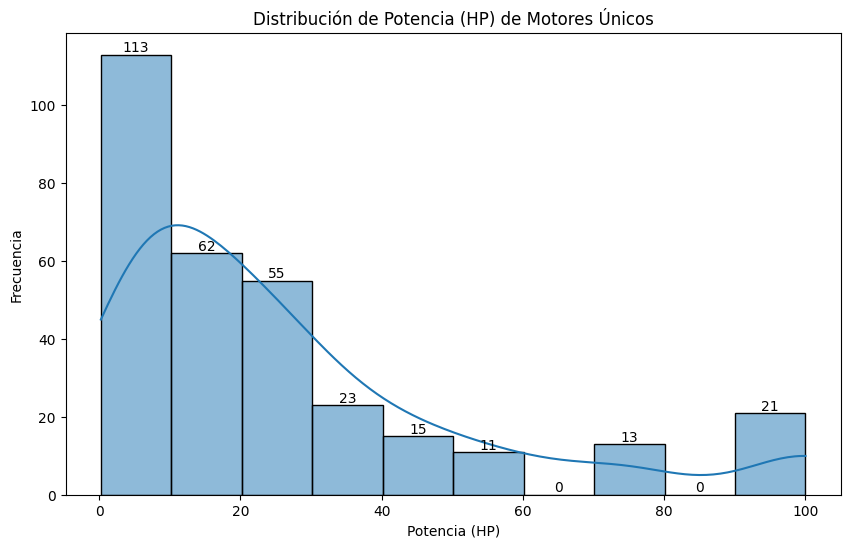

In [24]:

# Crear el histograma de la columna 'POTENCIA (HP)' para los motores únicos
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
sns.histplot(motores_unicos['POTENCIA (HP)'], kde=True, bins=10)
plt.title('Distribución de Potencia (HP) de Motores Únicos')
plt.xlabel('Potencia (HP)')
plt.ylabel('Frecuencia')
# Agregar etiquetas con la cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.show()


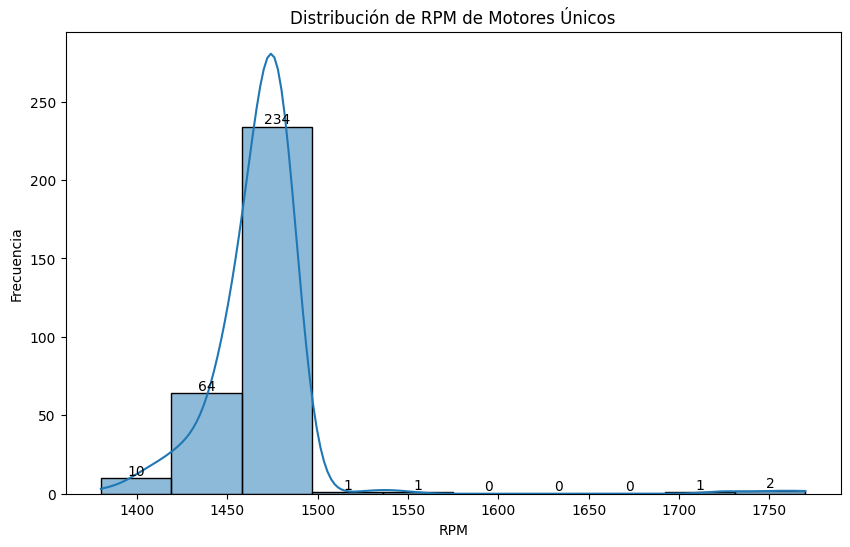

In [25]:
# Crear el histograma de la columna 'R.P.M' para los motores únicos
plt.figure(figsize=(10, 6))
sns.histplot(motores_unicos['R.P.M'], kde=True, bins=10)
plt.title('Distribución de RPM de Motores Únicos')
plt.xlabel('RPM')
plt.ylabel('Frecuencia')
# Agregar etiquetas con la cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.show()



# Graficos con Categorias

<ipython-input-26-d804699e3392>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=marca_counts.index, y=marca_counts.values, palette="viridis")


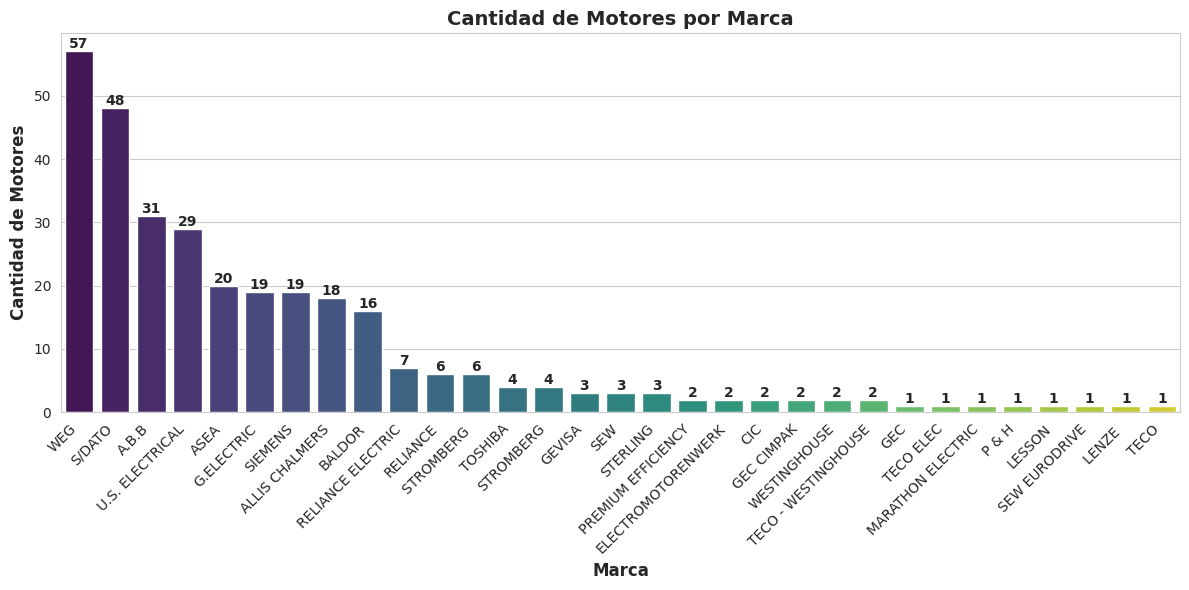

In [26]:
# Contar la cantidad de motores por marca
marca_counts = motores_unicos['MARCA '].value_counts()

# Configuración general del gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Estilo de fondo más elegante

# Crear gráfico de barras con colores gradientes
bars = sns.barplot(x=marca_counts.index, y=marca_counts.values, palette="viridis")

# Agregar etiquetas de valor en cada barra
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Etiquetas y título
plt.xlabel('Marca', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de Motores', fontsize=12, fontweight='bold')
plt.title('Cantidad de Motores por Marca', fontsize=14, fontweight='bold')

# Rotación de las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ajuste de los márgenes y presentación final
plt.tight_layout()
plt.show()

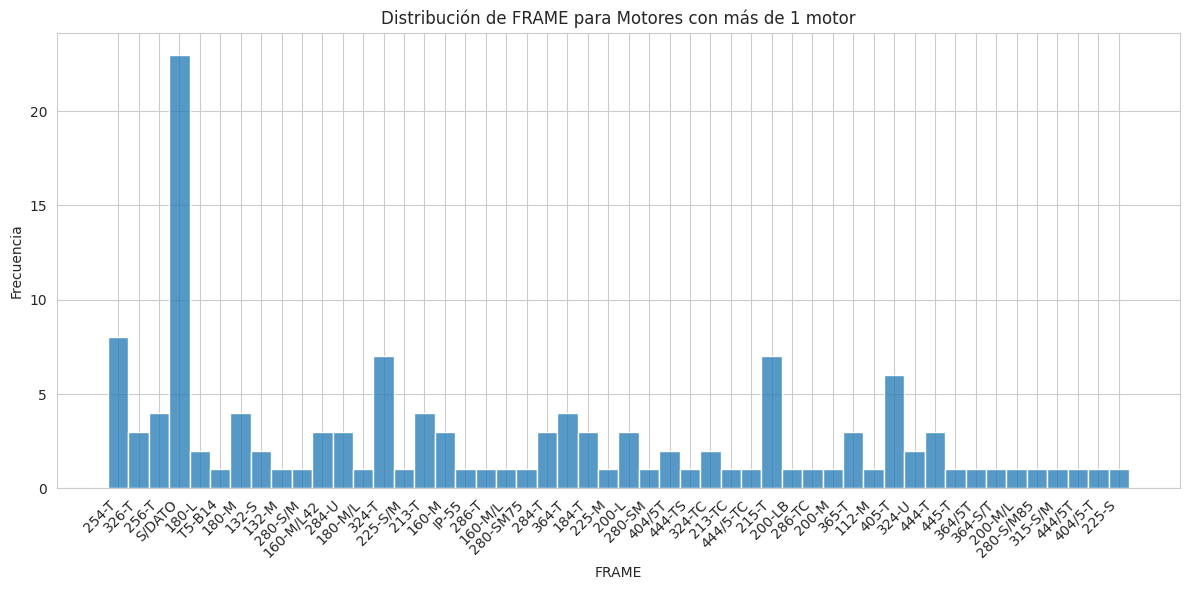

In [27]:
#Crear un histograma de la distribución de FRAME para motores con más de un motor
plt.figure(figsize=(12, 6))
sns.histplot(motores_unicos[motores_unicos['CANTIDAD'] > 1]['FRAME'], kde=False, bins=20)
plt.title('Distribución de FRAME para Motores con más de 1 motor')
plt.xlabel('FRAME')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráficos de dispersión 2D Y 3D

<ipython-input-28-6e137e9b2a14>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', num_frames)


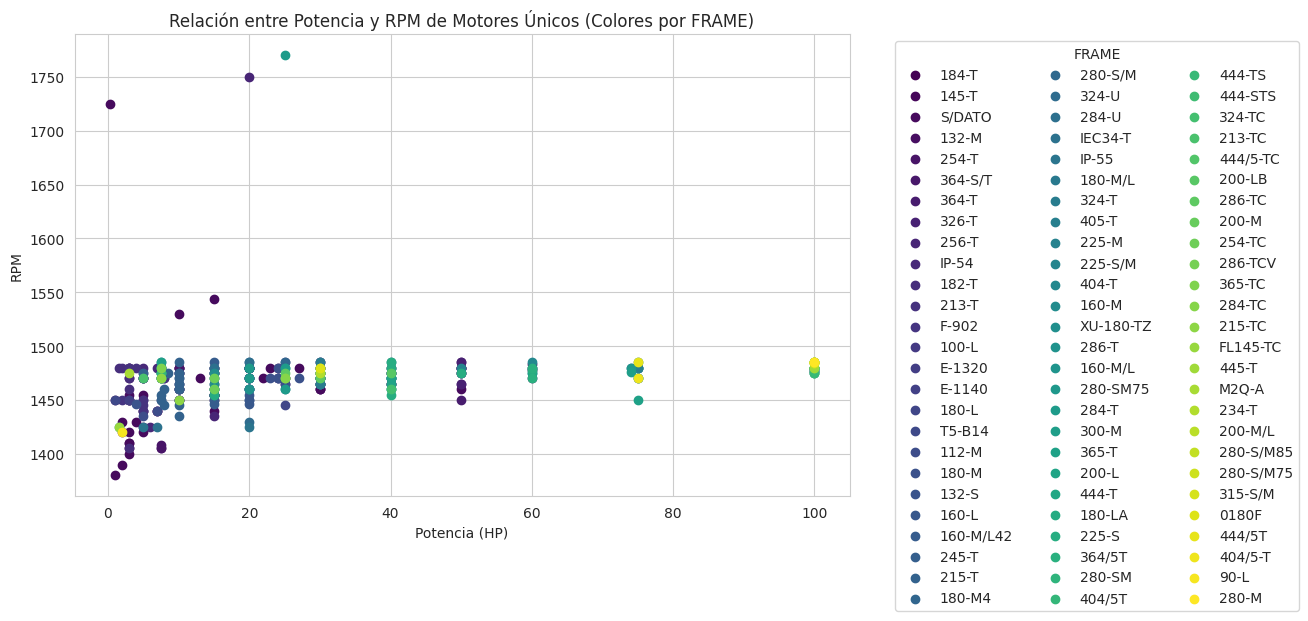

In [28]:
# Gráfico de dispersión de Potencia vs RPM con colores por FRAME
plt.figure(figsize=(10, 6))

# Crear una lista de colores únicos para cada FRAME
frames = motores_unicos['FRAME'].unique()
num_frames = len(frames)
colors = plt.cm.get_cmap('viridis', num_frames)

# Iterar sobre los FRAME y graficar los puntos con colores diferentes
for i, frame in enumerate(frames):
  subset = motores_unicos[motores_unicos['FRAME'] == frame]
  plt.scatter(subset['POTENCIA (HP)'], subset['R.P.M'], label=frame, color=colors(i))

plt.title('Relación entre Potencia y RPM de Motores Únicos (Colores por FRAME)')
plt.xlabel('Potencia (HP)')
plt.ylabel('RPM')
plt.legend(title='FRAME', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)
plt.show()

Mismo grafico anterior pero en 3D y con figuras

In [29]:
from sklearn.preprocessing import LabelEncoder

# Crear un LabelEncoder
le = LabelEncoder()
# Ajustar y transformar la columna 'FRAME' a una representación numérica
motores_unicos['FRAME_codificado'] = le.fit_transform(motores_unicos['FRAME'])

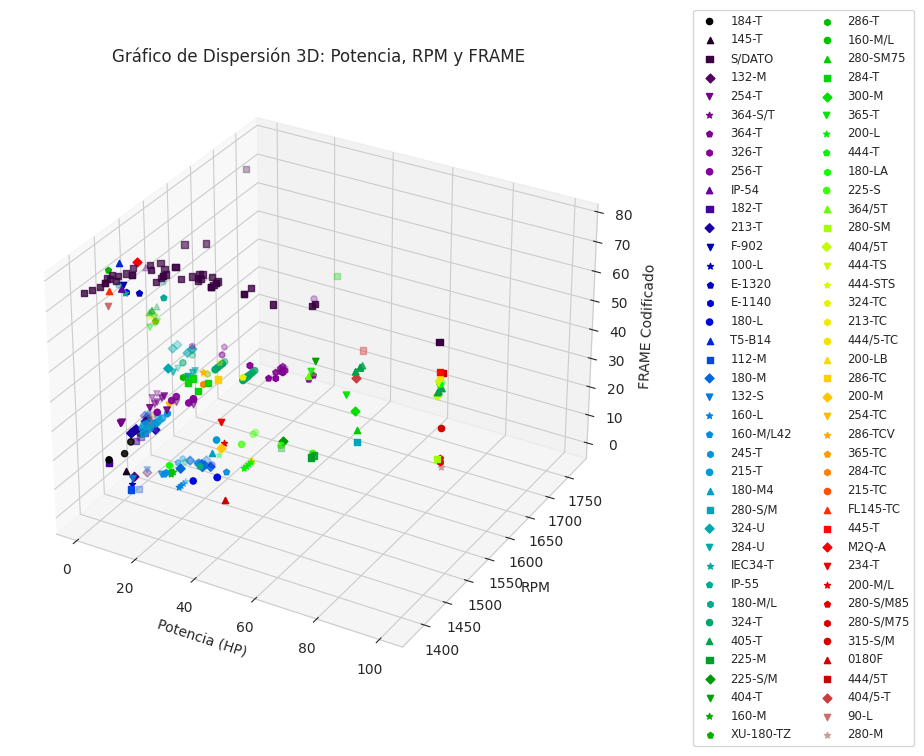

In [30]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a list of unique frame values
unique_frames = motores_unicos['FRAME'].unique()

# Define a list of markers for each frame
markers = ['o', '^', 's', 'D', 'v', '*', 'p', 'h']

# Create a dictionary to map frame values to colors
color_map = {frame: plt.cm.nipy_spectral(i / len(unique_frames)) for i, frame in enumerate(unique_frames)}

for frame in unique_frames:
    frame_data = motores_unicos[motores_unicos['FRAME'] == frame]

    # Select a marker for the frame (looping through markers)
    marker_index = unique_frames.tolist().index(frame) % len(markers)
    marker = markers[marker_index]


    # Scatter plot with color-encoding based on 'frame'
    scatter = ax.scatter(frame_data['POTENCIA (HP)'],
                         frame_data['R.P.M'],
                         frame_data['FRAME_codificado'],
                         c=[color_map[frame]] * len(frame_data),
                         marker=marker,
                         label=frame)


ax.set_xlabel('Potencia (HP)')
ax.set_ylabel('RPM')
ax.set_zlabel('FRAME Codificado')

# Add a legend to show the mapping of colors and markers to 'frame' values
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize='small', ncol=2) # Ajusta la posición y el número de columnas

plt.title('Gráfico de Dispersión 3D: Potencia, RPM y FRAME')

plt.show()

# Tabla para conocer la relacion de FRAME_codificado y el FRAME real

In [ ]:
# Crear una tabla de frames con frame codificado, frame y cantidad de registros
tabla_frames = motores_unicos.groupby(['FRAME_codificado', 'FRAME'])['ID_Motor'].count().reset_index(name='Cantidad_Registros')

print(tabla_frames)

    FRAME_codificado      FRAME  Cantidad_Registros
0                  0      0180F                   1
1                  1      100-L                   1
2                  2      112-M                   2
3                  3      132-M                   2
4                  4      132-S                   3
..               ...        ...                 ...
73                73      IP-55                   3
74                74      M2Q-A                   1
75                75     S/DATO                  50
76                76     T5-B14                   1
77                77  XU-180-TZ                   1

[78 rows x 3 columns]


In [ ]:
#para conocer los frame
lista_n = [47, 21, 19, 18, 12, 10, 8, 7, 6, 5, 4, 3, 2, 1]

for i in lista_n:
  frames = tabla_frames[tabla_frames['Cantidad_Registros'] == i]
  print(f"frames con {i} registros")
  print(frames)


frames con 47 registros
Empty DataFrame
Columns: [FRAME_codificado, FRAME, Cantidad_Registros]
Index: []
frames con 21 registros
    FRAME_codificado  FRAME  Cantidad_Registros
47                47  324-T                  21
frames con 19 registros
    FRAME_codificado  FRAME  Cantidad_Registros
23                23  215-T                  19
frames con 18 registros
    FRAME_codificado  FRAME  Cantidad_Registros
30                30  254-T                  18
frames con 12 registros
    FRAME_codificado  FRAME  Cantidad_Registros
21                21  213-T                  12
frames con 10 registros
    FRAME_codificado  FRAME  Cantidad_Registros
12                12  180-M                  10
frames con 8 registros
    FRAME_codificado  FRAME  Cantidad_Registros
32                32  256-T                   8
50                50  326-T                   8
frames con 7 registros
    FRAME_codificado  FRAME  Cantidad_Registros
15                15  182-T                   7
52       